### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Data Reading and Data Understanding

In [2]:
df = pd.read_csv('day.csv')                 # Reading the data using pandas and loading it into dataframe
pd.set_option('display.max_columns', None)

In [3]:
df.shape            # shape of the loaded dataset

(730, 16)

In [4]:
df.head()           # displaying dataframe

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()           # summary of attributes present in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()            # descriptive statistics of the data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.columns            # displaying the list of columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.dtypes            # checking the datatype of each column in the data

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Observation acquired by reading the data:

- The data read by the model contains 16 columns and 730 rows.
- From 16 columns we have 10 int data type , 4 float data type and 1 as object.
- This 1 column in the form object can be converted to datetime in future while preprocessing the data.
- Therefore, cnt is the target variable in the data read by the model and that specifies the number of bike shared.

### Data Preprocessing

In [9]:
df.isnull().sum()         # checking for null values in the dataframe

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.drop_duplicates(subset = None, inplace = True) # dropping duplicate values from the data 

In [11]:
df.shape       # if there are duplicate values in the data the shape of the dataframe will change

(730, 16)

In [12]:
df.head()      # displaying dataframe before dropping unwanted columns

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
df.drop(['instant',"dteday",'casual','registered'], axis = 1, inplace = True) # dropping unwanted columns

In [14]:
df.head()     # displaying dataframe after dropping unwanted columns

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.columns    # displaying the list of column present in dataframe after dropping unwanted columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
df.nunique()   # checking for unique values in dataframe

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

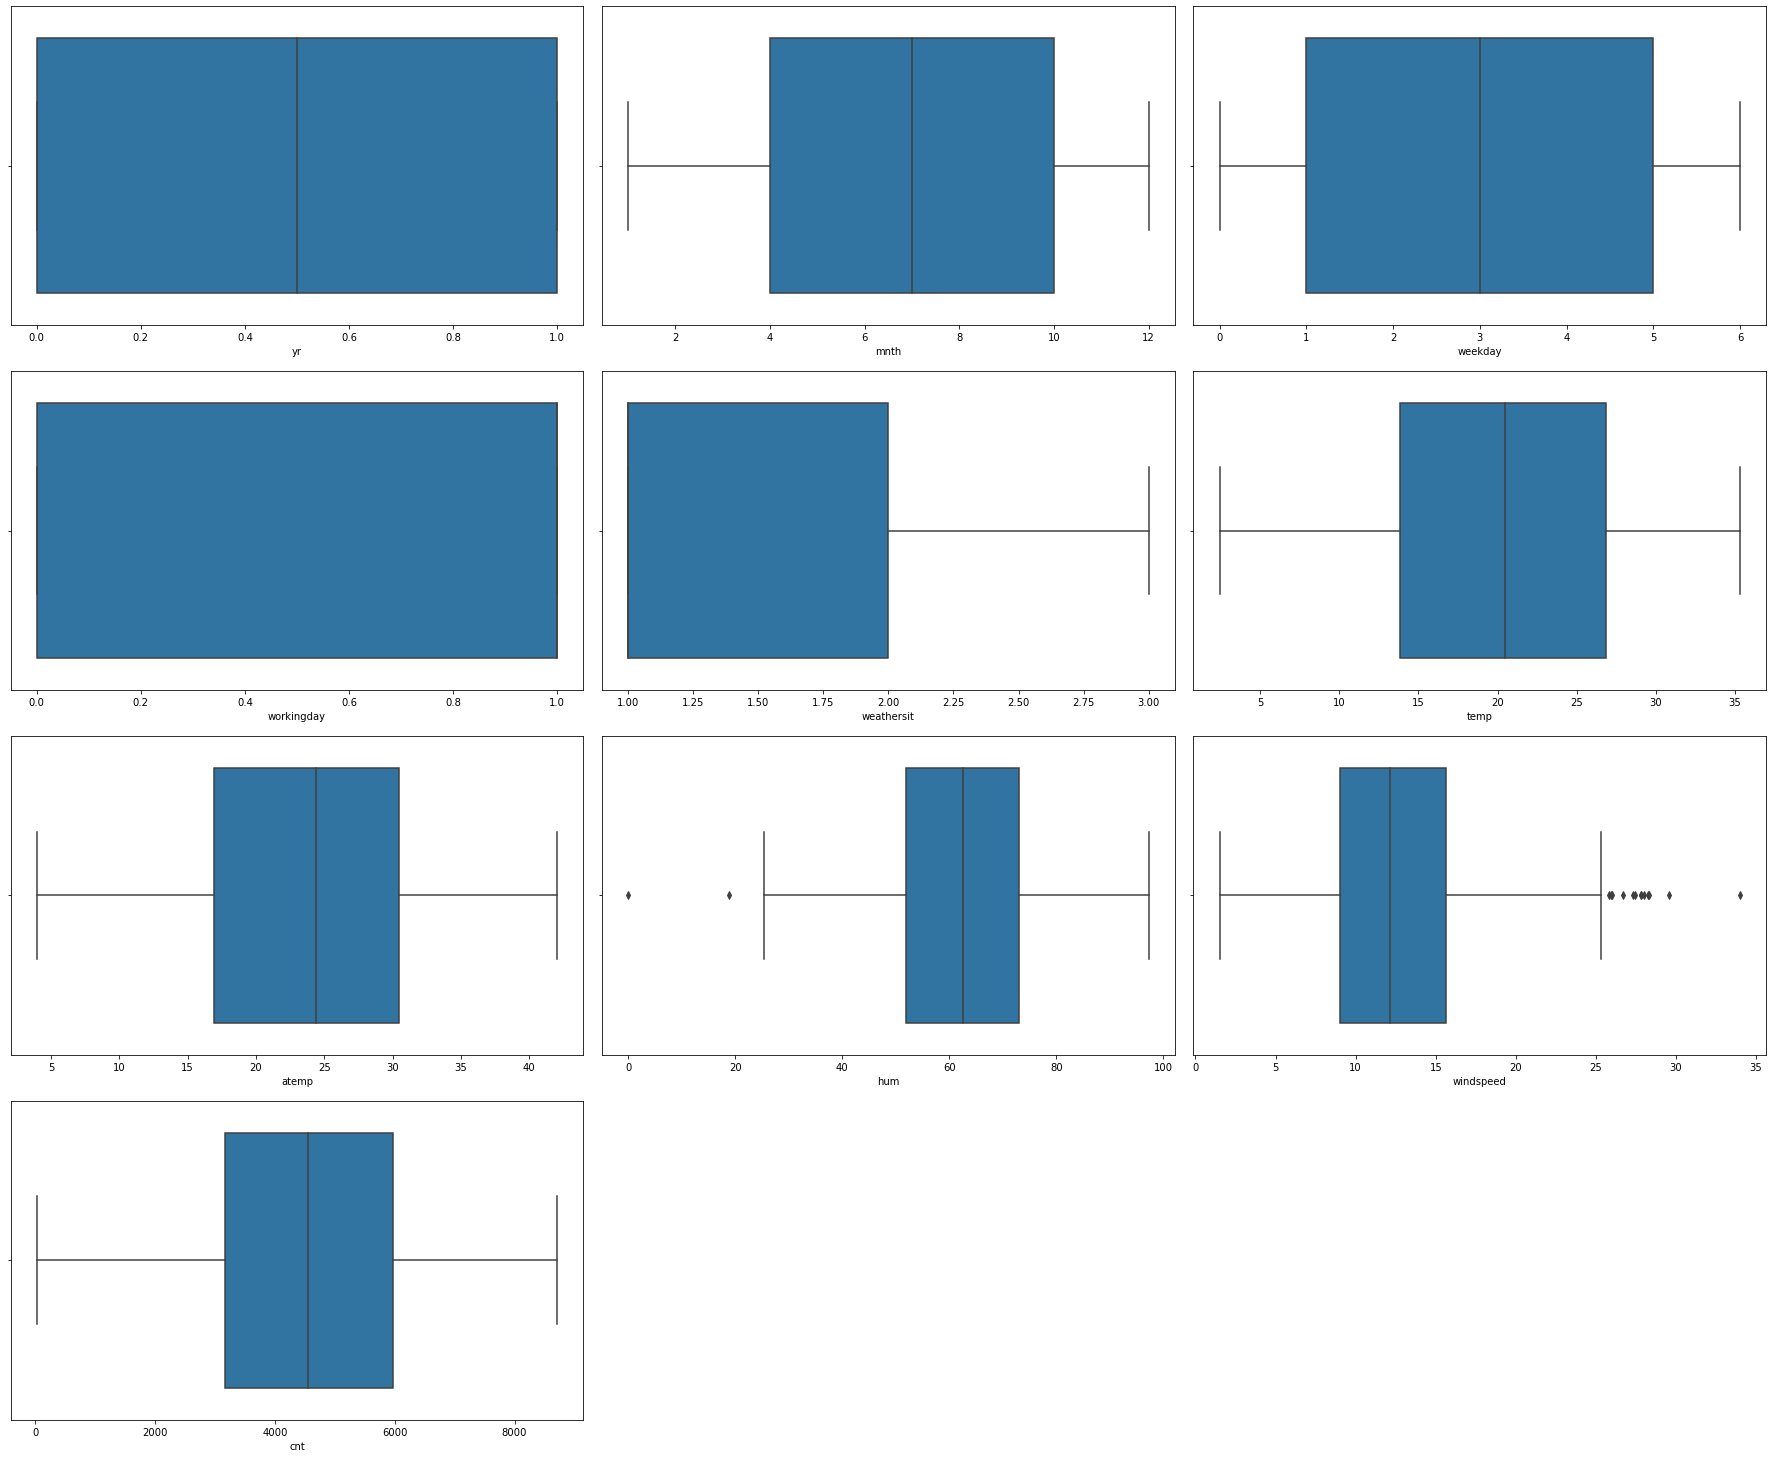

In [17]:
conti_df = df.copy()   # for variable with continuous values a box plot is created
conti_var = ["season","yr", "mnth","weekday","workingday","weathersit","temp","atemp","hum","windspeed",'cnt']
select_df = conti_df[conti_var]
plt.figure(figsize=(25,25))
for i in range(1,11):
    plt.subplot(5, 3, i)
    plt.tight_layout()
    sns.boxplot(select_df[select_df.columns[i]])

In [18]:
quan_1 = df["windspeed"].quantile(0.25)   # ranging interquartile for windspeed column 
quan_2 = df["windspeed"].quantile(0.75)
inter_quar = quan_2 - quan_1                      
fence_low  = quan_1 - 1.5*inter_quar
fence_high = quan_2 + 1.5*inter_quar
df["windspeed"] = np.where(df["windspeed"] > fence_high, df["windspeed"].median(),df["windspeed"])
df["windspeed"] = np.where(df["windspeed"] < fence_low, df["windspeed"].median(),df["windspeed"])


quan_3 = df["hum"].quantile(0.25)         # ranging interquartile for hum column 
quan_4 = df["hum"].quantile(0.75)
inter_quar = quan_4 - quan_3                              
fence_low  = quan_3 - 1.5*inter_quar
fence_high = quan_2 + 1.5*inter_quar
df["hum"] = np.where(df["hum"] >fence_high, df["hum"].median(),df["hum"])
df["hum"] = np.where(df["hum"] <fence_low, df["hum"].median(),df["hum"])

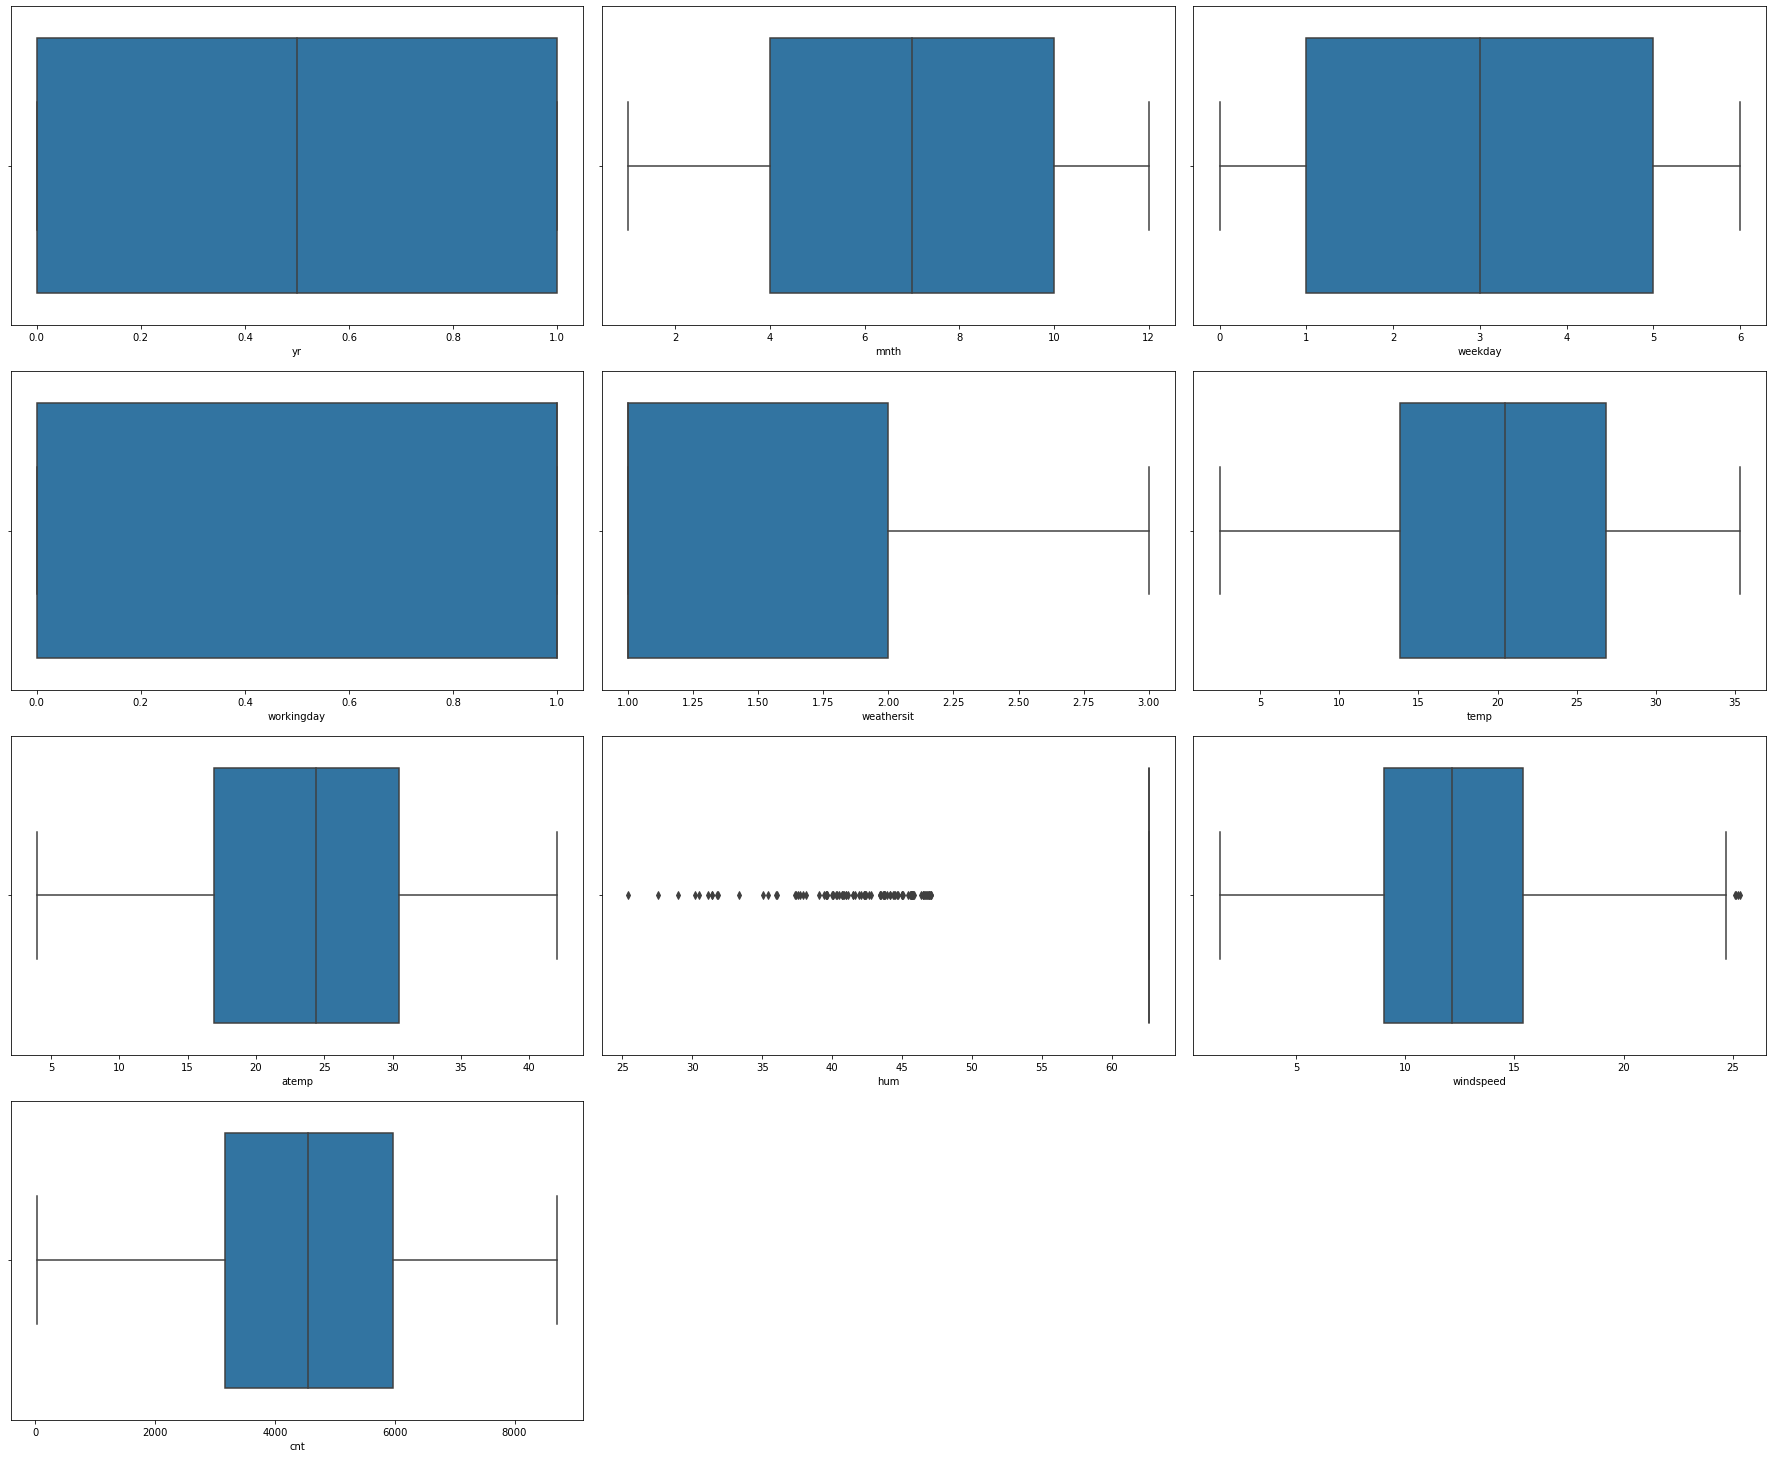

In [19]:
conti_df = df.copy()       # for variable with continuous values a box plot is created after ranging interquartile
conti_var = ["season","yr", "mnth","weekday","workingday","weathersit","temp","atemp","hum","windspeed",'cnt']
select_df = conti_df[conti_var]
plt.figure(figsize=(25,25))
for i in range(1,11):
    plt.subplot(5, 3, i)
    plt.tight_layout()
    sns.boxplot(select_df[select_df.columns[i]])

In [20]:
df.info()             # checking for variables that should be categorical instead of numericals

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [21]:
df.season.value_counts()    # season variable should be categorical or non-numerical category instead of numerical

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [22]:
df.weathersit.value_counts()    # weathersit variable should be categorical instead of being numerical

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [23]:
df.mnth.value_counts()         # mnth variable should be non-numerical category instead of being numerical

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [24]:
df.weekday.value_counts()    # weekday variable should be non-numerical category instead of being numerical

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [25]:
# Converting the numerical variables described above into categorical variables
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}  # converting season attribute or variable to categorical
df['season'] = df['season'].map(season_map)

weathersit_map = {1:'Clear_FewClouds', 2:'Mist_Cloudy', 3:'LightRain_LightSnow_Thunderstorm', 4:'HeavyRain_IcePallets_Thunderstorm_Mist'}
df['weathersit'] = df['weathersit'].map(weathersit_map) # converting weathersit variable to categorical

mnth_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
df['mnth'] = df['mnth'].map(mnth_map)         # converting mnth variable to categorical

weekday_map = {0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'}
df['weekday'] = df['weekday'].map(weekday_map)         # converting weekday variable to categorical


In [26]:
df.head()    # displaying the dataframe after completing all required preprocess or data cleaning steps

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,62.6250,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,62.6250,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tues,1,Clear_FewClouds,8.200000,10.60610,62.6250,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


#### Observation acquired by preprocessing the data:

- It is acknowledged that there is no null and duplicate values in the data uploaded the module
- Unwanted columns were dropped from the dataset
- There were some numerical columns which should non-numerical or categorical
- Those numerical columns were converted to non-numerical or categorical columns

### Exploratory Data Analysis

<Figure size 1440x2160 with 0 Axes>

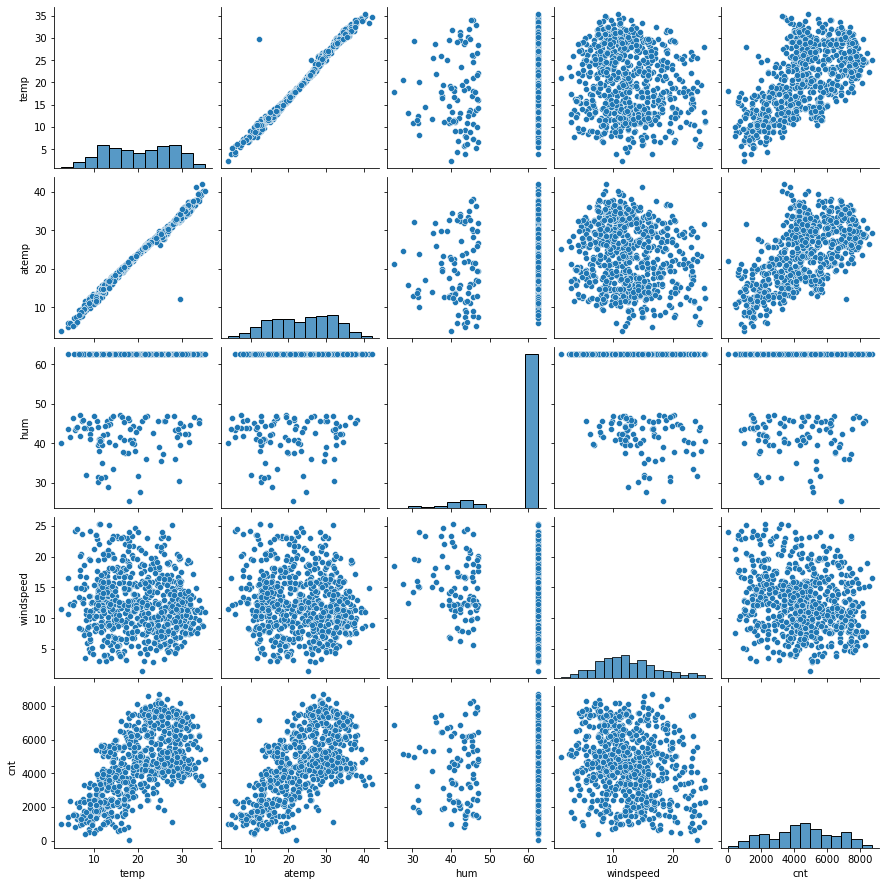

In [27]:
# checking for linear relationships
plt.figure(figsize = (20,30))                # for numerical variable pairplot is created
sns.pairplot(data = df, vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

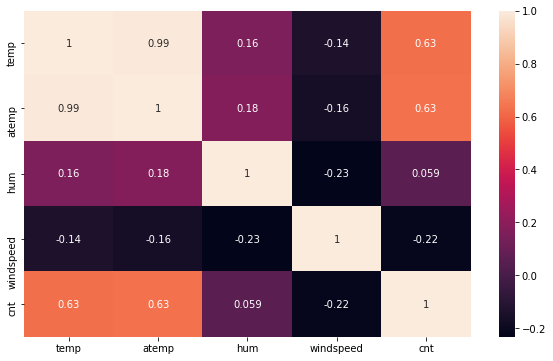

In [28]:
plt.figure(figsize = (10,6))     # using heatmap checking the correlation among numerical variables
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)
plt.show()

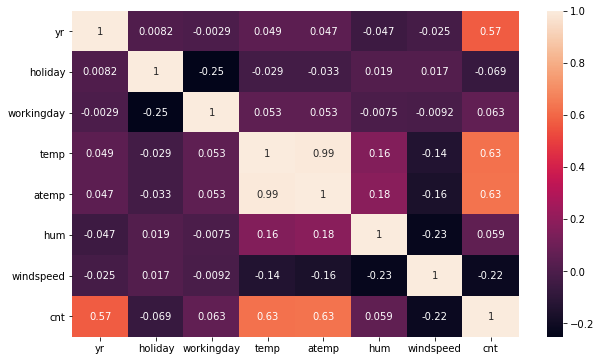

In [29]:
plt.figure(figsize = (10,6))    # using heatmap and corr function checking the correlation among numerical variables
sns.heatmap(df.corr(), annot = True)
plt.show()

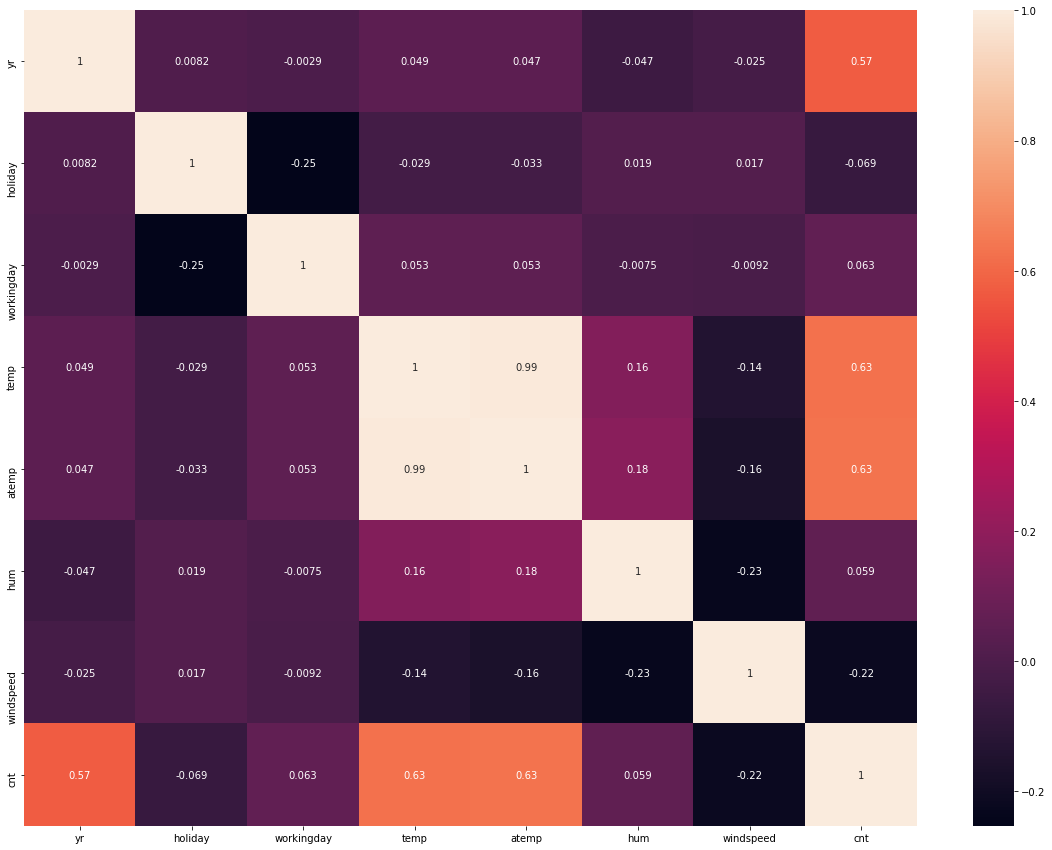

In [30]:
plt.figure(figsize = (20,15))   # using heatmap checking the correlation among all the variables present in the data
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Observation acquired by analyzing the data using Exporatory Data Analysis technique:

- There is a linear and high correleation between the column like temp and atemp.
- From the graph it is acknowledged that the target variable 'cnt' has high correlation with temp and atemp variables.
- Heatmap stated ablove describes us that the correlation between temp and atemp is 0.99 which indicates that they       both are highly correlated.
- This may be because that atemp variable might is derived from temp which is why they are highly correlated.
- Therefore, as atemp and temp is hihly correlated atemp column is dropped from the dataframe.

### Visualization

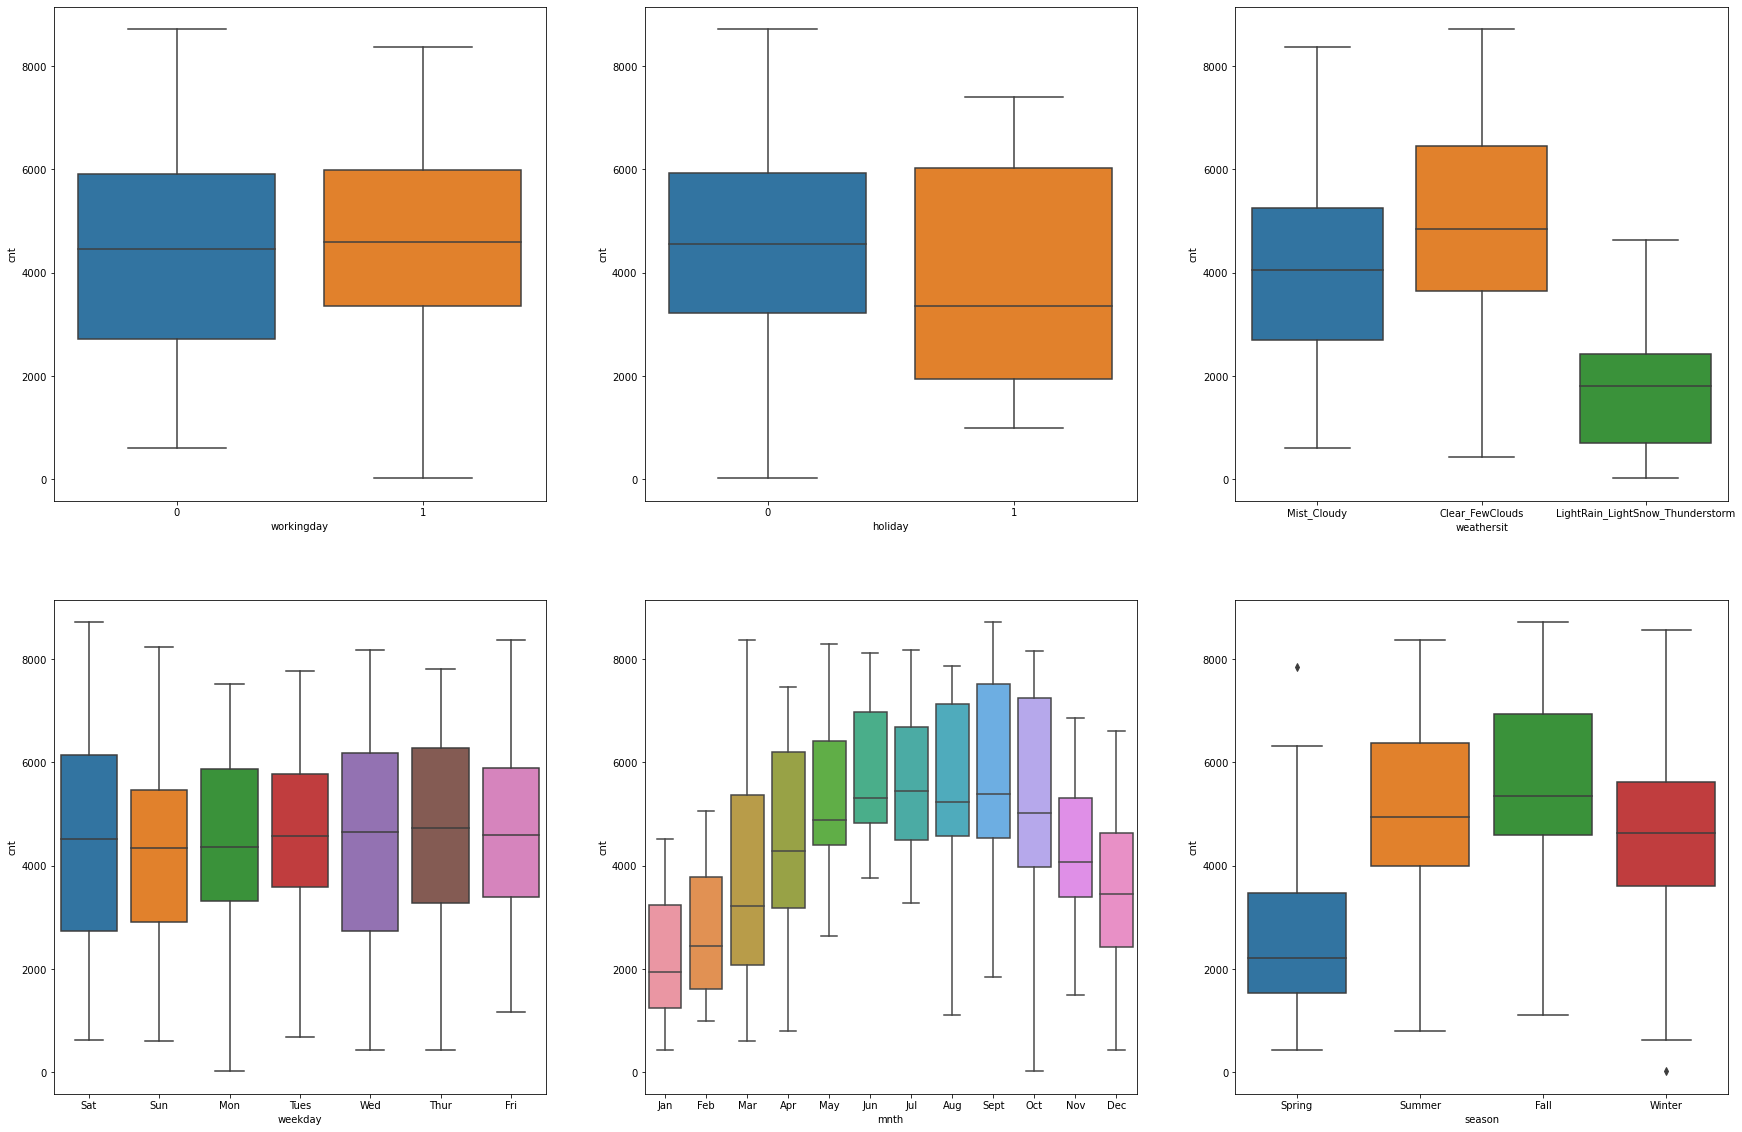

In [31]:
# visualizing categorical variables with target variables
plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.boxplot(x='workingday', y='cnt', data = df)   # making boxplots for the workingday categorical variables 

plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='cnt', data = df)      # making boxplots for the holiday categorical variables

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data = df)   # making boxplots for the weathersit categorical variables

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data = df)      # making boxplots for the weekday categorical variables

plt.subplot(2,3,5)
sns.boxplot(x='mnth', y='cnt', data = df)         # making boxplots for the mnth categorical variables

plt.subplot(2,3,6)
sns.boxplot(x='season', y='cnt', data = df)       # making boxplots for the season categorical variables

plt.show()

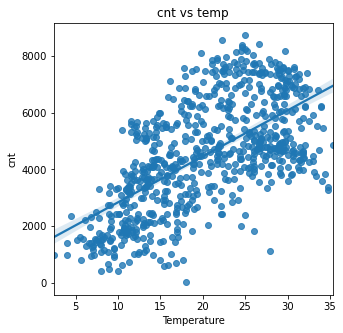

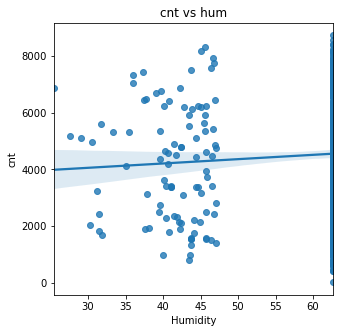

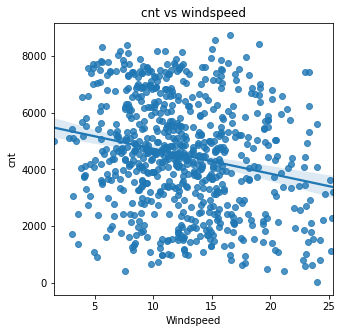

In [32]:
# visualizing numerical variables with target variables using regplot
plt.figure(figsize=(5,5))    
plt.title('cnt vs temp')                 # visualizing temp numerical variable with target variable
sns.regplot(data=df, y='cnt', x='temp')
plt.xlabel('Temperature')
plt.show()

plt.figure(figsize=(5,5))
plt.title('cnt vs hum')                  # visualizing hum numerical variable with target variable
sns.regplot(data=df, y='cnt', x='hum')
plt.xlabel('Humidity')
plt.show()

plt.figure(figsize=(5,5))
plt.title('cnt vs windspeed')            # visualizing windspeed numerical variable with target variable
sns.regplot(data=df, y='cnt', x='windspeed')
plt.xlabel('Windspeed')
plt.show()


#### Observation acquired by visualizing the data:

- By creating the box plot graph for categorical variables it is acknowledged that there is a gradual increase and       decrease in the demand.
- From the first and fourth plot that is for the variable 'workingday' and 'weathersit' we don't see any significant     insights from the graph.
- From the second plot for variable 'holiday' the demand has decreased as there is a holiday.
- From the third plot that is for the variable 'weathersit' it is acknowleded that the demand has increased during         'Clear_Few clouds'and 'Partly cloudy' weather.
- From the fifth plot that is for the variable 'mnth' it is acknowledged that the demand is continuously increasing       till the month of june and after september the demand is decreasing.
- This also shows us that the maximum demand or booking happens during the month of september.
- From the sixth plot that is for the variable 'season' it is acknowledged that maximum booking happens during the       'fall season'.
- By visualizing temp numerical variable with target variable it is acknowledged that there is a linear relation         betweek the variable temp and target variable cnt and Demand is positively correlated to the variable temp.
- By visualizing hum numerical variable with target variable it is acknowledged that the values are more scattered and   cnt is decreasing with increase in humidity.
- By visualizing windspeed numerical variable with target variable it is acknowledged that the values are more           scattered and cnt is decreasing with increase in windspeed

### Data Preparation

In [33]:
# creating dummy variables for categorical variables
# mnth, season, weathersit, weekday are the four categorical variables for which dummy variables are created

df = pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first = True)

In [34]:
df.columns      # displaying list of columns present in dataframe after creating dummy variables

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tues',
       'weekday_Wed', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [35]:
df.head()     # displaying the dataframe after the process of data preparation

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,62.6250,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,62.6250,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,62.6250,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splittling of Data 

In [36]:
df.shape  # shape of the dataframe before splitting the data

(730, 30)

In [37]:
y = df['cnt']      # Y is considered as a target variable
X = df.drop(['cnt'], axis = 1)    # X is considered as a independent variable

In [38]:
X.head()  # displaying independent variable dataset which are considered as X

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,62.6250,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,62.6250,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,62.6250,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
y.head()  # displaying target variable dataset which are considered as y

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)  # splitting the data
# data will be splitted into training and testing dataset

In [41]:
# checking the shape of dataset after splitting the data
X_train.shape     # shape of independent variable training dataset

(547, 29)

In [42]:
X_test.shape      # shape of independent variable testing dataset

(183, 29)

In [43]:
y_train.shape     # shape of target variable training dataset

(547,)

In [44]:
y_test.shape      # shape of target variable testing dataset

(183,)

### Feature Scaling

In [45]:
num_vars = ['temp','atemp','hum','windspeed'] # 4 numerical variables from the dataset is taken 

In [46]:
scaler = MinMaxScaler()    # using MinMaxScaler selected features are scaled

In [47]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])  # Scaling considered variables

In [48]:
X_train.head()    # displaying independent training variable after scaling

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
311,0,0,1,0.435124,0.437339,1.000000,0.079610,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.548158,0.396299,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,1.000000,0.913706,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
413,1,0,0,0.358285,0.362754,1.000000,0.442594,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,1.000000,0.216644,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [49]:
X_train.describe()   # discriptive statistics of independent training variable after the process of feature scaling

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_Wed,weathersit_LightRain_LightSnow_Thunderstorm,weathersit_Mist_Cloudy
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.929492,0.428207,0.257770,0.244973,0.244973,0.093236,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,0.080439,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.027422,0.349177
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.199398,0.213231,0.437807,0.430465,0.430465,0.291029,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,0.272220,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.163460,0.477146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,1.000000,0.274055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,1.000000,0.407392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,1.000000,0.560179,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection

In [50]:
lr = LinearRegression()      # linear regression algorithm is implemented and the fitted to the splitted data
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', False, 10),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 12),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 13),
 ('weathersit_LightRain_LightSnow_Thunderstorm', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [53]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thur', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [55]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Nov', 'mnth_Sept',
       'weekday_Sat', 'weekday_Sun',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [56]:
X_train_rfe = X_train[columns]

In [57]:
X_train_rfe.shape

(547, 15)

### Model Building

##### Model_1 - Utilizing all the columns collected by RFE in this model

In [58]:
columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [59]:
columns

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [60]:
X_train_sm1 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          3.48e-200
Time:                        20:24:26   Log-Likelihood:                -4422.2
No. Observations:                 547   AIC:                             8874.
Df Residuals:                     532   BIC:                             8939.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features    VIF
4                                           hum  19.16
3                                          temp  14.66
2                                    workingday   5.04
5                                     windspeed   4.50
6                                 season_Spring   3.05
0                                            yr   2.06
7                                 season_Winter   2.06
11                                  weekday_Sat   1.90
13                       weathersit_Mist_Cloudy   1.73
8                                      mnth_Jan   1.58
9                                      mnth_Jul   1.36
10                                    mnth_Sept   1.20
1                                       holiday   1.19
12  weathersit_LightRain_LightSnow_Thunderstorm   1.10


##### Model_2 - Droping mnth_Jan column from the model_1

In [62]:
columns = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [63]:
columns

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Jul',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [64]:
X_train_sm2 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.52e-200
Time:                        20:24:26   Log-Likelihood:                -4424.1
No. Observations:                 547   AIC:                             8876.
Df Residuals:                     533   BIC:                             8937.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features    VIF
4                                           hum  19.01
3                                          temp  14.32
2                                    workingday   5.01
5                                     windspeed   4.50
6                                 season_Spring   2.69
0                                            yr   2.06
7                                 season_Winter   2.05
10                                  weekday_Sat   1.89
12                       weathersit_Mist_Cloudy   1.73
8                                      mnth_Jul   1.36
9                                     mnth_Sept   1.20
1                                       holiday   1.19
11  weathersit_LightRain_LightSnow_Thunderstorm   1.10


##### Model_3 - Dropping 'hum' variable from model_2

In [66]:
columns = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [67]:
columns

['yr',
 'holiday',
 'workingday',
 'temp',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Jul',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [68]:
X_train_sm3 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     229.2
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.08e-201
Time:                        20:24:26   Log-Likelihood:                -4424.2
No. Observations:                 547   AIC:                             8874.
Df Residuals:                     534   BIC:                             8930.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features   VIF
3                                          temp  6.63
2                                    workingday  4.83
4                                     windspeed  4.47
0                                            yr  2.06
5                                 season_Spring  1.88
9                                   weekday_Sat  1.86
11                       weathersit_Mist_Cloudy  1.57
6                                 season_Winter  1.49
7                                      mnth_Jul  1.34
8                                     mnth_Sept  1.20
1                                       holiday  1.18
10  weathersit_LightRain_LightSnow_Thunderstorm  1.09


##### Model_4 - Dropping 'holiday' column from model_3

In [70]:
columns = ['yr', 'workingday', 'temp', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [71]:
columns

['yr',
 'workingday',
 'temp',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Jul',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [72]:
X_train_sm4 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          3.65e-201
Time:                        20:24:26   Log-Likelihood:                -4428.4
No. Observations:                 547   AIC:                             8881.
Df Residuals:                     535   BIC:                             8932.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                       Features   VIF
2                                          temp  6.45
3                                     windspeed  4.41
1                                    workingday  4.32
0                                            yr  2.06
4                                 season_Spring  1.81
8                                   weekday_Sat  1.74
10                       weathersit_Mist_Cloudy  1.57
5                                 season_Winter  1.45
6                                      mnth_Jul  1.34
7                                     mnth_Sept  1.20
9   weathersit_LightRain_LightSnow_Thunderstorm  1.09


##### Model_5 - Dropping 'temp' column from model_4

In [74]:
columns = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Jul', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [75]:
columns

['yr',
 'workingday',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Jul',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [76]:
X_train_sm5 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.35e-159
Time:                        20:24:26   Log-Likelihood:                -4530.5
No. Observations:                 547   AIC:                             9083.
Df Residuals:                     536   BIC:                             9130.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
2                                    windspeed  3.57
1                                   workingday  3.17
0                                           yr  1.89
3                                season_Spring  1.57
9                       weathersit_Mist_Cloudy  1.55
7                                  weekday_Sat  1.53
4                                season_Winter  1.44
5                                     mnth_Jul  1.14
6                                    mnth_Sept  1.12
8  weathersit_LightRain_LightSnow_Thunderstorm  1.08


##### Model_6 - Dropping 'mnth_Jul' column from model_5

In [78]:
columns = ['yr', 'workingday', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [79]:
columns

['yr',
 'workingday',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [80]:
X_train_sm6 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.64e-160
Time:                        20:24:26   Log-Likelihood:                -4530.9
No. Observations:                 547   AIC:                             9082.
Df Residuals:                     537   BIC:                             9125.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
2                                    windspeed  3.55
1                                   workingday  3.09
0                                           yr  1.88
8                       weathersit_Mist_Cloudy  1.55
3                                season_Spring  1.51
6                                  weekday_Sat  1.51
4                                season_Winter  1.40
5                                    mnth_Sept  1.11
7  weathersit_LightRain_LightSnow_Thunderstorm  1.08


##### Model_7 - Dropping 'windspeed' column from model_6

In [82]:
columns = ['yr', 'workingday', 
       'season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [83]:
columns

['yr',
 'workingday',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [84]:
X_train_sm7 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          8.18e-155
Time:                        20:24:26   Log-Likelihood:                -4546.0
No. Observations:                 547   AIC:                             9110.
Df Residuals:                     538   BIC:                             9149.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
1                                   workingday  2.27
0                                           yr  1.80
7                       weathersit_Mist_Cloudy  1.52
2                                season_Spring  1.38
3                                season_Winter  1.38
5                                  weekday_Sat  1.30
4                                    mnth_Sept  1.11
6  weathersit_LightRain_LightSnow_Thunderstorm  1.07


##### Model_8 - Dropping 'workingday' column from model_7

In [86]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy']

In [87]:
columns

['yr',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy']

In [88]:
X_train_sm8 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          3.07e-151
Time:                        20:24:26   Log-Likelihood:                -4557.2
No. Observations:                 547   AIC:                             9130.
Df Residuals:                     539   BIC:                             9165.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
0                                           yr  1.47
6                       weathersit_Mist_Cloudy  1.38
2                                season_Winter  1.28
1                                season_Spring  1.26
4                                  weekday_Sat  1.14
3                                    mnth_Sept  1.09
5  weathersit_LightRain_LightSnow_Thunderstorm  1.05


##### Model_9 - Adding column 'temp' to the model number 9

In [90]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp']

In [91]:
columns

['yr',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy',
 'temp']

In [92]:
X_train_sm9 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     294.1
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          6.43e-191
Time:                        20:24:26   Log-Likelihood:                -4461.2
No. Observations:                 547   AIC:                             8940.
Df Residuals:                     538   BIC:                             8979.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
7                                         temp  2.43
0                                           yr  2.04
6                       weathersit_Mist_Cloudy  1.51
2                                season_Winter  1.30
1                                season_Spring  1.26
4                                  weekday_Sat  1.17
3                                    mnth_Sept  1.15
5  weathersit_LightRain_LightSnow_Thunderstorm  1.06


##### Model_10 - Adding the column 'holiday' for the model number 10

In [94]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weekday_Sat', 'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday']

In [95]:
columns

['yr',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weekday_Sat',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy',
 'temp',
 'holiday']

In [96]:
X_train_sm10 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm10).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     273.3
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          4.56e-194
Time:                        20:24:26   Log-Likelihood:                -4450.9
No. Observations:                 547   AIC:                             8922.
Df Residuals:                     537   BIC:                             8965.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
7                                         temp  2.43
0                                           yr  2.04
6                       weathersit_Mist_Cloudy  1.51
2                                season_Winter  1.31
1                                season_Spring  1.29
4                                  weekday_Sat  1.18
3                                    mnth_Sept  1.15
5  weathersit_LightRain_LightSnow_Thunderstorm  1.06
8                                      holiday  1.05


##### Model_11 - Dropping the variable 'weekday_Sat' and instead of that variable 'weekday_Sun' is utilized in model number 10

In [98]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [99]:
columns

['yr',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy',
 'temp',
 'holiday',
 'weekday_Sun']

In [100]:
X_train_sm11 = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm11).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     283.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          1.60e-197
Time:                        20:24:26   Log-Likelihood:                -4442.8
No. Observations:                 547   AIC:                             8906.
Df Residuals:                     537   BIC:                             8949.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
6                                         temp  2.47
0                                           yr  2.04
5                       weathersit_Mist_Cloudy  1.51
2                                season_Winter  1.31
1                                season_Spring  1.29
8                                  weekday_Sun  1.18
3                                    mnth_Sept  1.15
4  weathersit_LightRain_LightSnow_Thunderstorm  1.06
7                                      holiday  1.05


##### Model_12 - This model is built using sklearn

In [102]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [103]:
lr = LinearRegression()
lr.fit(X_train[columns], y_train)

LinearRegression()

In [104]:
print(lr.coef_)

[ 2019.9445453  -1026.69465165   534.70197014   626.38677362
 -2685.59206338  -676.12577024  3783.34340099 -1095.54248085
  -414.92133514]


In [105]:
print(lr.intercept_)

1900.2077279016025


In [106]:
coeff_df = pd.DataFrame(lr.coef_,X_train[columns].columns,columns=['Coefficient'])
coeff_df

,Coefficient
yr,2019.944545
season_Spring,-1026.694652
season_Winter,534.701970
mnth_Sept,626.386774
weathersit_LightRain_LightSnow_Thunderstorm,-2685.592063
weathersit_Mist_Cloudy,-676.125770
temp,3783.343401
holiday,-1095.542481
weekday_Sun,-414.921335


#### Observation acquired by building 12 different models 

- By building Model_1 and Model_2 it is acknowledged that 'days_old' column or variable has highest VIF among other variables and it was futher dropped by the model.
- By building Model_3 it is acknowledged that 'holidays' column has high p-value when compared to the other variable. Therefore, it is an insignificant variable and it was dropped and not included in the model_4.
- By building Model_4 it is acknowledged that 'temp' variable has has highest VIF among other variables and it was dropped and not included in the model_5.
- By building Model_5 it is acknowledged that 'mnth_jul'column has high p-value when compared to the other variable. Therefore, it is an insignificant variable and it was dropped and not included in the model_6.
- By building Model_6 it is acknowledged that 'windspeed' variable has has highest VIF among other variables and it was dropped and not included in the model_7.
- By building Model_7 it is acknowledged that 'workingday' variable has has highest VIF among other variables and it was dropped and not included in the model_8.
- By building Model_8 it is acknowledged that 'workingday' variable was not included in this model.
- By building Model_9 it is acknowledged that 'temp' variable was added to this model.
- By building Model_10 it is acknowledged that 'holiday' variable was added to this model.
- By building Model_11 it is acknowledged that 'weekday_Sat' variable was dropped and instead of that 'weekday_Sun'variable was utilized to that model.
- Model_11 was selected as a final model for final model because of the reasons provided below:
    - For variables the p-value was 0.0 and R2 was 0.826.
    - There was no multicolinearity as the VIF for all the variables was in acceptable range.
    - There were no additional parameters that can be removed from this model as the difference between R-squared and Adjusted R-squared values for this model is very less.

### Model Evaluation

In [107]:
y_train_pred = lr.predict(X_train[columns])  # Predicting the model for the training dataset

In [108]:
residual = y_train - y_train_pred            # creating a residual using target variable  

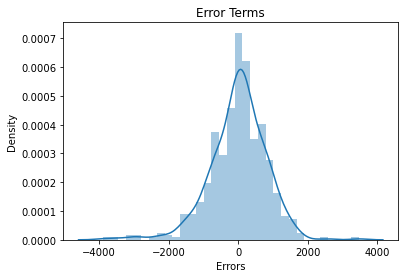

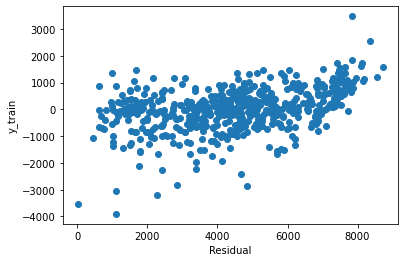

Text(0, 0.5, 'y_train_pred')

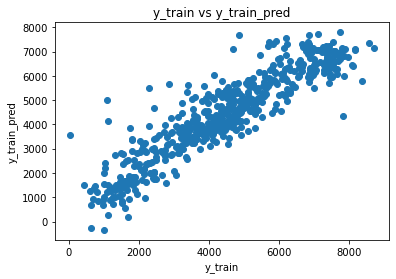

In [109]:
sns.distplot(residual)       # Plotting the histogram of error terms to analyse the data using residuals
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

plt.scatter(y_train,residual) # Plotting the scatter plot for the created residuals to check the linear relationship
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

plt.scatter(y_train, y_train_pred)   # Evaluation of Homoscedasticity 
plt.title('y_train vs y_train_pred')             
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

In [110]:
vif = pd.DataFrame()              # Evalution of multicolinearity in the model
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                                      Features   VIF
6                                         temp  2.47
0                                           yr  2.04
5                       weathersit_Mist_Cloudy  1.51
2                                season_Winter  1.31
1                                season_Spring  1.29
8                                  weekday_Sun  1.18
3                                    mnth_Sept  1.15
4  weathersit_LightRain_LightSnow_Thunderstorm  1.06
7                                      holiday  1.05


#### Observation acquired by evaluating the model:

- From the histogram aquired by anayzing the model using residual it is analyzed that residuals are normally distributed and it also shows that all our assumptions are valid.
- Accross predictions variance of the residuals (error terms) is constant which means as the value of the predictor variable changes error term does not vary.
- By calcuting VIF value it is acknowledged that as all the values are within permissible range of below 5 there is no multicollinearity existing between the predictor variables.

### Predictions and Interpretations

In [111]:
variables = ['temp','atemp','hum','windspeed']   # Scaling the variables in X_test 
X_test[variables] = scaler.transform(X_test[variables]) # Test data will not fit it can only be transformed

In [112]:
columns = ['yr','season_Spring', 'season_Winter', 'mnth_Sept',
       'weathersit_LightRain_LightSnow_Thunderstorm',
       'weathersit_Mist_Cloudy', 'temp', 'holiday','weekday_Sun']

In [113]:
columns

['yr',
 'season_Spring',
 'season_Winter',
 'mnth_Sept',
 'weathersit_LightRain_LightSnow_Thunderstorm',
 'weathersit_Mist_Cloudy',
 'temp',
 'holiday',
 'weekday_Sun']

In [114]:
y_test_pred = lr.predict(X_test[columns])  # Predicting the values for the provided test data

In [115]:
r2_score(y_test,y_test_pred)    # R2_score or R-Squared value for the test dataset

0.7934290929103035

In [116]:
coeff_df

,Coefficient
yr,2019.944545
season_Spring,-1026.694652
season_Winter,534.701970
mnth_Sept,626.386774
weathersit_LightRain_LightSnow_Thunderstorm,-2685.592063
weathersit_Mist_Cloudy,-676.125770
temp,3783.343401
holiday,-1095.542481
weekday_Sun,-414.921335


#### Observation acquired by predictions and interpretation:

Variables that are significant to predict the demand for shared bikes are described below:
- temp
- yr
- holiday
- season
- weekday Sunday
- month

Equation acquired by the model for the best fit line is described below:

cnt = 1900.2077 + (2019.944545*yr) + ((-1026.694652)*season_Spring) +(534.701970*season_Winter) + (626.386774*mnth_Sept) + ((-2685.592063)*weathersit_LightRain_LightSnow_Thunderstorm) + ((-676.125770)*weathersit_Mist_Cloudy) + (676.125770*temp) + ((-1095.542481)*holiday) + ((-414.921335)*weekday_Sun)

Here,
- yr: coefficient of yr depicts that yr will increase bike hiring by 2019.944545 value if the unit increase in yr variable
- season_Spring: coefficient of season_Spring depicts that season_Spring will decrease bike hiring by 1026.694652 value if the unit increase in season_Spring variable.
- season_Winter: coefficient of season_Winter depicts that season_Winter will increase bike hiring by 534.701970 value if the unit increase in season_Winter variable.
- mnth_Sept: coefficient of mnth_Sept depicts that mnth_Sept will increase bike hiring by 626.386774 value if the unit increase in mnth_Sept variable.
- weathersit_LightRain_LightSnow_Thunderstorm: coefficient of weathersit_LightRain_LightSnow_Thunderstorm depicts that weathersit_LightRain_LightSnow_Thunderstorm will decrease bike hiring by 2685.592063 value if the unit increase in weathersit_LightRain_LightSnow_Thunderstorm variable.
- weathersit_Mist_Cloudy: coefficient of weathersit_Mist_Cloudy depicts that weathersit_Mist_Cloudy will decrease bike hiring by 676.125770 value if the unit increase in weathersit_Mist_Cloudy variable.
- temp: coefficient of temp depicts that temp will increase bike hiring by 676.125770 value if the unit increase in temp variable.
- weekday_Sun: coefficient of weekday_Sun depicts that weekday_Sun will decrease bike hiring by 414.921335 value if the unit increase in weekday_Sun variable.